# 二维黎曼问题

[![下载Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_notebook.png)](https://obs.dualstack.cn-north-4.myhuaweicloud.com/mindspore-website/notebook/master/mindflow/zh_cn/cfd/mindspore_riemann2d.ipynb)&emsp;[![下载样例代码](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_download_code.png)](https://obs.dualstack.cn-north-4.myhuaweicloud.com/mindspore-website/notebook/master/mindflow/zh_cn/cfd/mindspore_riemann2d.py)&emsp;[![查看源文件](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source.png)](https://gitee.com/mindspore/docs/blob/master/docs/mindflow/docs/source_zh_cn/cfd/riemann2d.ipynb)

本案例要求**MindSpore版本 >= 2.0.0**调用如下接口: *mindspore.jit，mindspore.jit_class*。

黎曼问题，以伯恩哈德·黎曼命名，是由守恒方程和分段常数初始条件组成的特定初值问题，在研究区域内具有单个间断面。黎曼问题在理解欧拉方程等方程具有重要作用，因为该方程所有的性质，如冲击和稀疏波，都出现在黎曼问题的解中。此外，黎曼问题还给出了包括欧拉方程在内的一些复杂非线性方程的精确解。

在数值分析中，由于网格的离散性，很自然地，黎曼问题出现在守恒方程的有限体积求解中，因此，它被广泛应用在计算流体力学和计算磁流体力学的模拟中。

## 问题描述

二维黎曼问题的定义为：

$$
\frac{\partial}{\partial t} \left(\begin{matrix} \rho \\ \rho u \\ \rho v \\ E \\\end{matrix} \right) + \frac{\partial}{\partial x} \left(\begin{matrix} \rho u \\ \rho u^2 + p \\ \rho u v \\ u(E + p) \\\end{matrix} \right) + \frac{\partial}{\partial y} \left(\begin{matrix} \rho v \\ \rho uv \\ \rho v^2 + p \\ v(E + p) \\\end{matrix} \right) = 0
$$

$$
E = \frac{\rho}{\gamma - 1} + \frac{1}{2}\rho u^2
$$

其中，对理想气体， $\gamma = 1.4$ ，初始条件为：

$$
\left(\begin{matrix} \rho \\ u \\ v \\ p \\\end{matrix}\right)_{x<0.5, y>0.5} = \left(\begin{matrix} 0.5323 \\ 1.206 \\ 0.0 \\ 0.3 \\\end{matrix}\right), \quad
\left(\begin{matrix} \rho \\ u \\ v \\ p \\\end{matrix}\right)_{x>0.5, y>0.5} = \left(\begin{matrix} 1.5 \\ 0.0 \\ 0.0 \\ 1.5 \\\end{matrix}\right)
$$

$$
\left(\begin{matrix} \rho \\ u \\ v \\ p \\\end{matrix}\right)_{x<0.5, y<0.5} = \left(\begin{matrix} 0.138 \\ 1.206 \\ 1.206 \\ 0.029 \\\end{matrix}\right), \quad
\left(\begin{matrix} \rho \\ u \\ v \\ p \\\end{matrix}\right)_{x>0.5, y<0.5} = \left(\begin{matrix} 0.5323 \\ 0.0 \\ 1.206 \\ 0.3 \\\end{matrix}\right)
$$

本案例中`src`包可以在[src](https://gitee.com/mindspore/mindscience/tree/master/MindFlow/applications/cfd/riemann2d/src)下载。

In [1]:
from mindspore import context
from mindflow import load_yaml_config, vis_2d
from mindflow import cfd
from mindflow.cfd.runtime import RunTime
from mindflow.cfd.simulator import Simulator

from src.ic import riemann2d_ic

context.set_context(device_target="GPU", device_id=3)

## 定义Simulator和RunTime

网格、材料、仿真时间、边界条件和数值方法的设置在文件[numeric.yaml](https://gitee.com/mindspore/mindscience/blob/master/MindFlow/applications/cfd/riemann2d/numeric.yaml)中。

In [2]:
config = load_yaml_config('numeric.yaml')
simulator = Simulator(config)
runtime = RunTime(config['runtime'], simulator.mesh_info, simulator.material)

## 初始条件

根据网格坐标确定初始条件。

In [3]:
mesh_x, mesh_y, _ = simulator.mesh_info.mesh_xyz()
pri_var = riemann2d_ic(mesh_x, mesh_y)
con_var = cfd.cal_con_var(pri_var, simulator.material)

## 执行仿真

随时间推进执行仿真。

In [4]:
while runtime.time_loop(pri_var):
    pri_var = cfd.cal_pri_var(con_var, simulator.material)
    runtime.compute_timestep(pri_var)
    con_var = simulator.integration_step(con_var, runtime.timestep)
    runtime.advance()

current time = 0.000000, time step = 0.001005
current time = 0.001005, time step = 0.001005
current time = 0.002010, time step = 0.001005
current time = 0.003016, time step = 0.001005
current time = 0.004021, time step = 0.001005
current time = 0.005026, time step = 0.001005
current time = 0.006031, time step = 0.001005
current time = 0.007036, time step = 0.001005
current time = 0.008041, time step = 0.001005
current time = 0.009046, time step = 0.001005
current time = 0.010051, time step = 0.001005
current time = 0.011057, time step = 0.001005
current time = 0.012062, time step = 0.001005
current time = 0.013067, time step = 0.001005
current time = 0.014072, time step = 0.001005
current time = 0.015076, time step = 0.001005
current time = 0.016081, time step = 0.001005
current time = 0.017086, time step = 0.001005
current time = 0.018091, time step = 0.001005
current time = 0.019097, time step = 0.001005
current time = 0.020102, time step = 0.001005
current time = 0.021107, time step

## 仿真结果后处理

您可以对密度、压力、速度进行可视化。

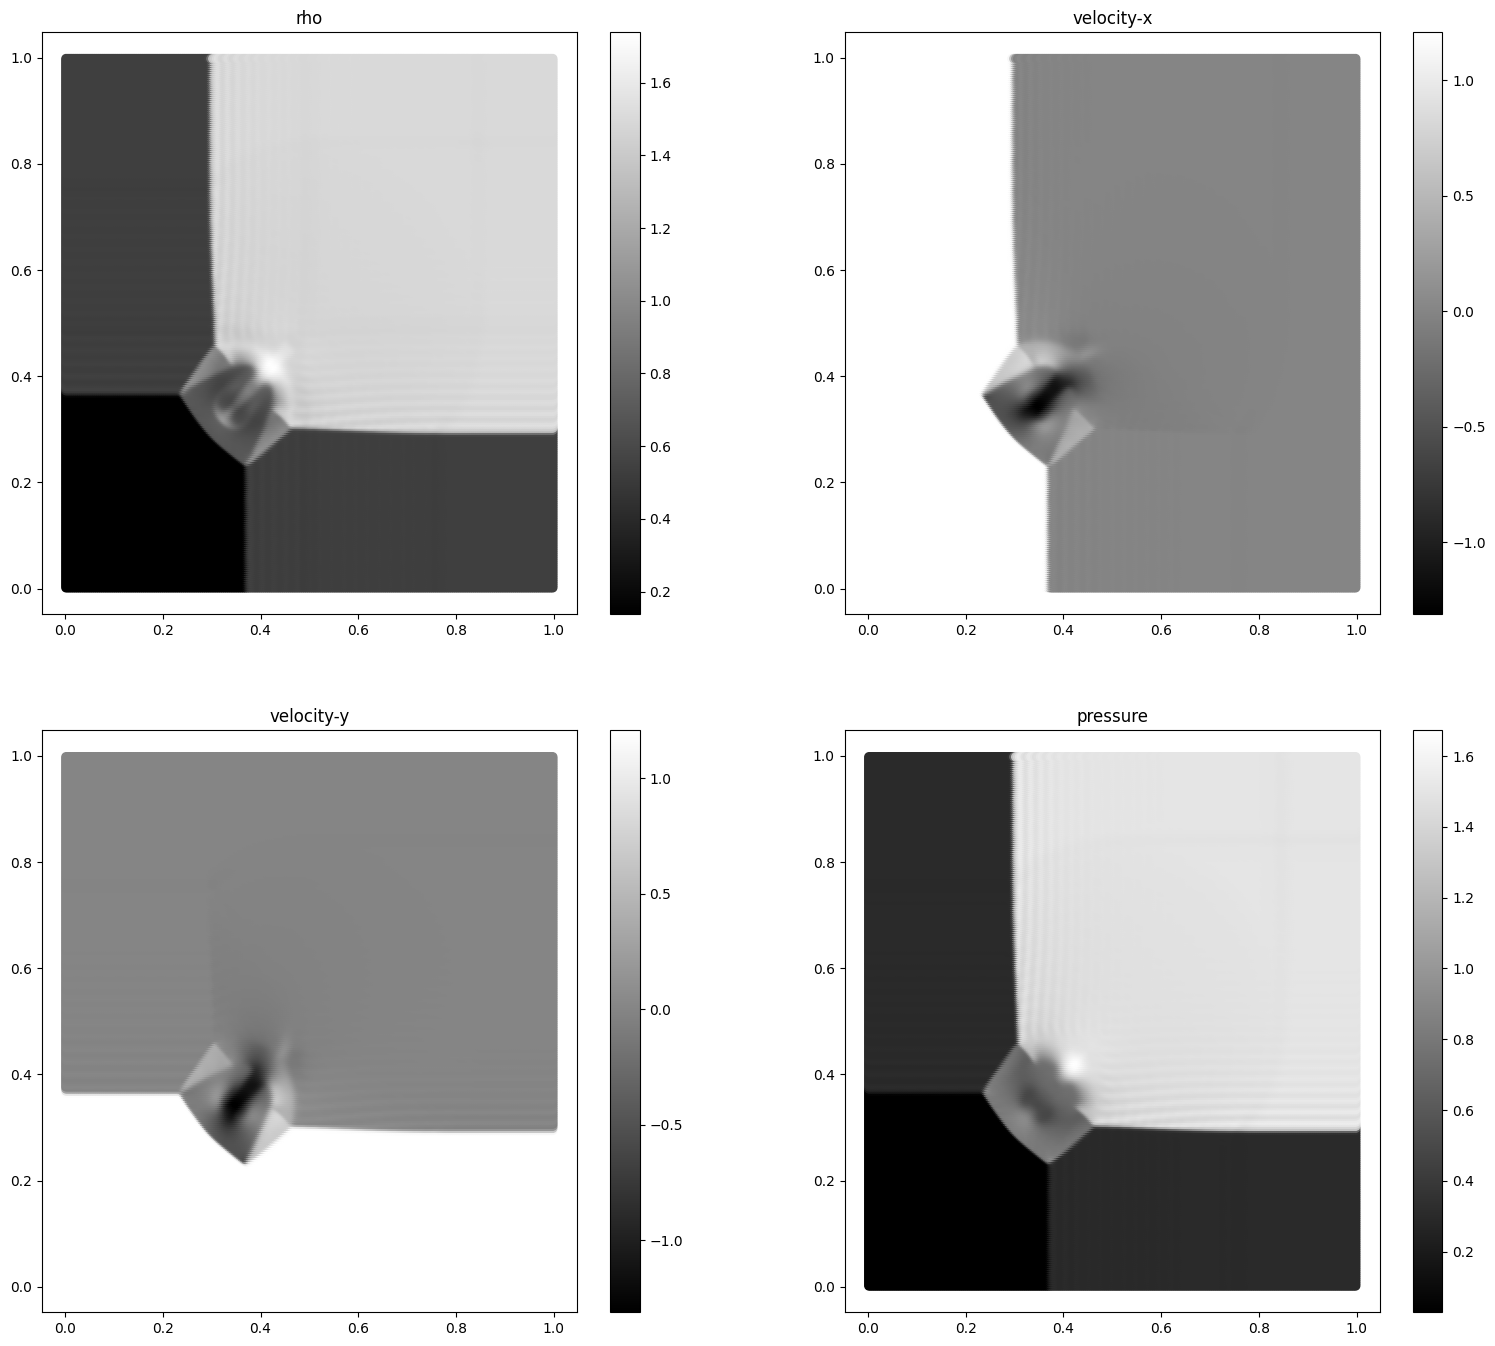

In [5]:
pri_var = cfd.cal_pri_var(con_var, simulator.material)
vis_2d(pri_var, 'riemann2d.jpg')